<font size=+2 color="#3B3534"><center><b>Analysing Diwali Sales Data</b></center></font>

### Introduction

The number of people and their purchases during Diwali Sale makes a major role in the revenue of many businesses. The problem is to identify how the customer experience can be increased by analyzing the given Diwali sales data so as to increase the revenue in the coming years. Exploratory Data Analysis using Python is to be performed to get the relevant information.


**Table of Contents**

1. [Introduction](#Introduction)
2. [Importing Libraries](#Importing-Libraries)
3. [Data Collection](#Data-Collection)
4. [Data Cleaning](#Data-Cleaning)
5. [EDA](#Exploratory-Data-Analysis-(EDA))
6. [Conclusion](#Conclusion) 



### Importing Libraries

In [1]:
#import Python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt      # Importing pyplot interface using matplotlib
import seaborn as sns                # Importing seaborm library for interactive visualization

import warnings                      # Importing warnings to disable runtime warnings
warnings.filterwarnings("ignore")

### Data Collection

The Diwali dataset is given in the form of csv file

In [2]:
#import the dataset to pandas dataframe

df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")

In [3]:
# shape or dimension of the dataframe - number of rows and columns

df.shape

(11251, 14)

Observation - 11251 rows, 14 columns

In [4]:
#display the first 5 rows 

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


Observation - The columns - 'Status' and 'Unnamed' consists of only null values

In [6]:
# description of the numerical data in the dataframe

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,Unnamed
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [7]:
#to get the column names

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed'],
      dtype='object')

### Data Cleaning

#### Handling Irrelevant Data

In [8]:
#remove the columns - Status and Unnamed 

df.drop(['Status','Unnamed'], axis = 1, inplace = True)

In [9]:
#cheking

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


Observation - The two columns are dropped

#### Handling Null Values 

In [10]:
#to check if there is any null values in the data frame
#if null is present - True, otherwise - False

pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#to get the sum of null values in every column

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

Observation - The column 'Amount' consists of 12 null values

In [12]:
#filter the rows with null values

print("Rows with null values:")

rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

Rows with null values:


,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


Observation - The data in those 12 rows can be important. So, filling the null values in Amount column with mean value of each Product_category

In [13]:
#fill Nan with mean value of each category

df['Amount'] = df.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [14]:
#checking

pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Observation - there are no null values in Amount column

#### Handling Data Format 

In [15]:
#change data type of Amount column from float to int

df['Amount'] = df['Amount'].astype('int')

In [16]:
#checking for the datatype of Amount column

df['Amount'].dtypes

dtype('int32')

In [17]:
#define a function to categorize age

def categorize_age(age):
    if age <= 15:
        return '0-15'
    elif age <= 25:
        return '16-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    elif age <= 65:
        return '56-65'
    else:
        return '65+'
    
#Apply the function to create the new column Age_group
df['Age_Group'] = df['Age'].apply(categorize_age)

df[['Age','Age_Group']]

,Age,Age_Group
0,28,26-35
1,35,26-35
2,35,26-35
3,16,16-25
4,28,26-35
...,...,...
11246,19,16-25
11247,33,26-35
11248,40,36-45
11249,37,36-45


Observation - 7 age groups are created

### Exploratory Data Analysis (EDA)

In [18]:
#get the column names

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Age_Group'],
      dtype='object')

#### GENDER

<AxesSubplot:xlabel='Gender', ylabel='count'>

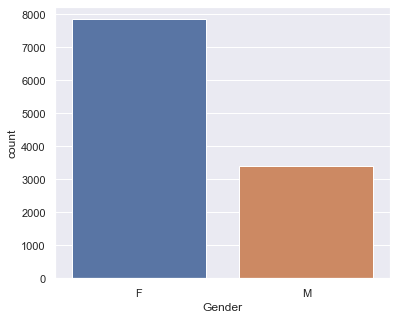

In [19]:
#set the figure size
sns.set(rc = {"figure.figsize" : (6,5)})

#plotting count plot - gender and it's count
sns.countplot(x = 'Gender', data = df)


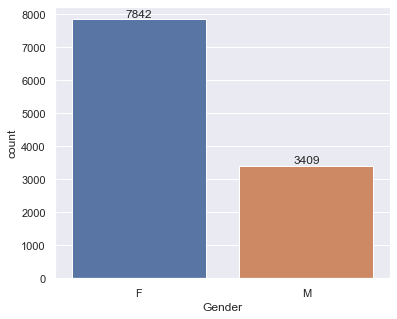

In [20]:
#set the figure size
sns.set(rc = {"figure.figsize" : (6,5)})

#plotting count plot - gender and it's count
ax = sns.countplot(x = 'Gender', data = df)

#display the count of each gender
for bars in ax.containers:
    ax.bar_label(bars)

Observation - There are 7842 Females and 3409 Males had placed the order. Females had placed more number of orders.

  Gender    Amount
0      F  74491401
1      M  31948174


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

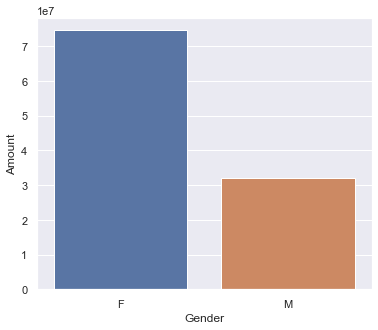

In [21]:
#creating a new frame
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum()
print(sales_gender)

#set the figure size
sns.set(rc = {"figure.figsize" : (6,5)})

#plotting bar plot - gender vs amount
sns.barplot(x='Gender', y='Amount', data=sales_gender)


Observation - From the customer point of view, females are spending more amount compared to males.

#### AGE 

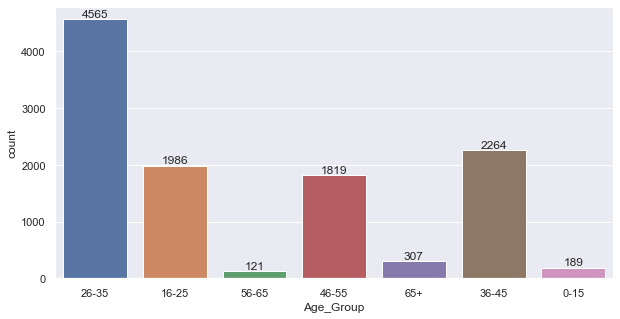

In [22]:
#set the figure size
sns.set(rc = {"figure.figsize" : (10,5)})

#plotting count plot - Age group and it's count
ax = sns.countplot(x = 'Age_Group', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

Observation - Most of the buyers are in the age group - 26-35.

<AxesSubplot:xlabel='Age_Group', ylabel='Amount'>

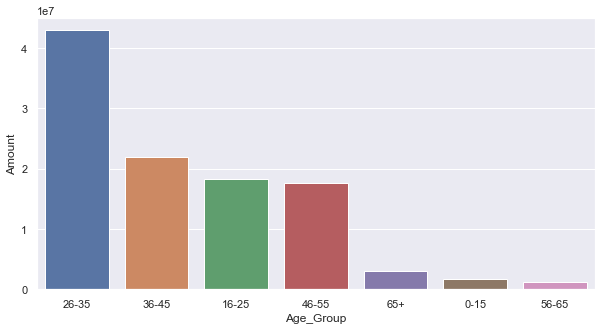

In [23]:
#create a new data frame
sales_age = df.groupby(['Age_Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

#set the figure size
sns.set(rc = {"figure.figsize" : (10,5)})

#plotting bar plot - Age group vs amount
sns.barplot(x = 'Age_Group', y = 'Amount', data = sales_age)


Observation - Considering the amount of money spent, most of the buyers are in the age group - 26-35

#### AGE and GENDER

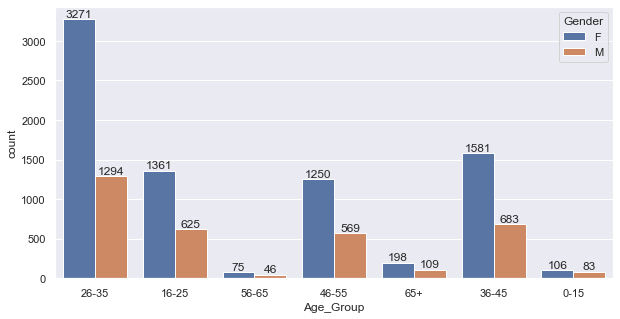

In [24]:
#plotting count plot - Age group and Gender

ax = sns.countplot(x = 'Age_Group', hue = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

Observation - In all the age groups, females are the prominent buyers.

#### STATE

<AxesSubplot:xlabel='State', ylabel='Orders'>

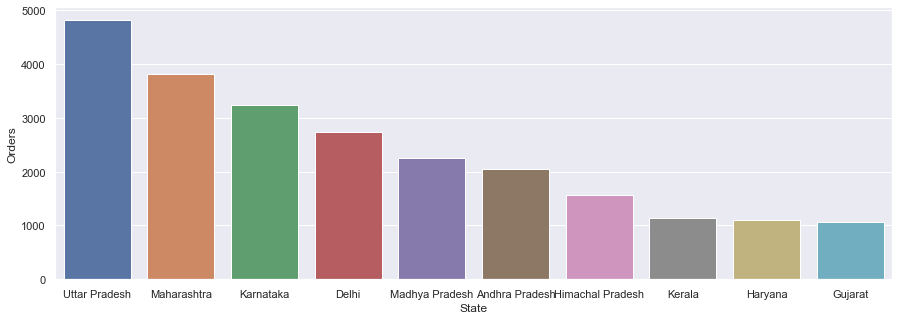

In [25]:
#create a new data frame to find total number of orders from top 10 states
sales_state = df.groupby(['State'],as_index = False)["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

#set the figure size
sns.set(rc = {"figure.figsize" : (15,5)})

#plotting bar plot - State vs Amount
sns.barplot(x = "State", y = "Orders", data = sales_state)


Observation - Most of the orders are from the states - Uttar Pradesh, Maharashtra, and Karnataka

<AxesSubplot:xlabel='State', ylabel='Amount'>

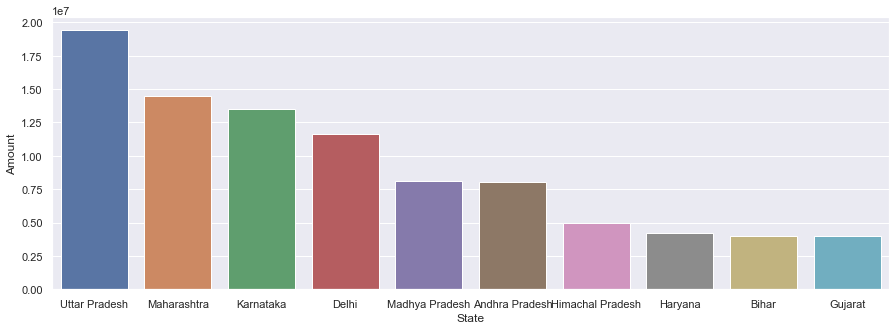

In [26]:
#create a new data frame to find total amount spent from top 10 states
sales_state = df.groupby(['State'],as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

#set the figure size
sns.set(rc = {"figure.figsize" : (15,5)})

#plotting bar plot - State vs Amount
sns.barplot(x = "State", y = "Amount", data = sales_state)

Observation - Most of the sales amount are from the states - Uttar Pradesh, Maharashtra, and Karnataka

#### MARITAL STATUS 

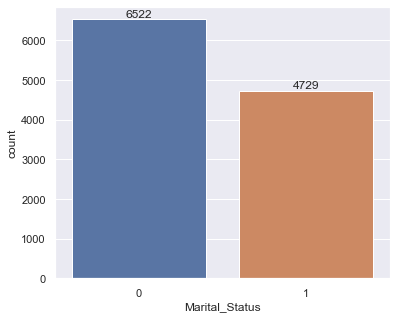

In [27]:
#set the figure size
sns.set(rc = {"figure.figsize" : (6,5)})

#plotting count plot - Marital Staus and it's count
ax = sns.countplot(x = 'Marital_Status', data = df)

#display the count 
for bars in ax.containers:
    ax.bar_label(bars)
    

Observation - Most of the buyers are unmarried (Marital_Status = 0)

#### MARITAL STATUS and GENDER 

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

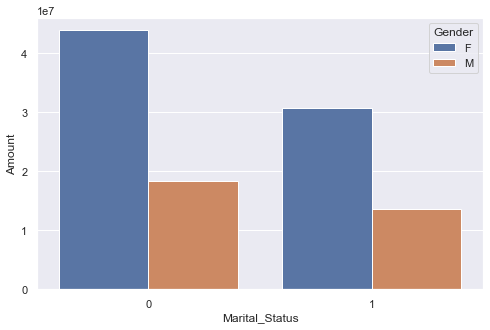

In [28]:
#create a new data frame to find total amount spent by Marital Status and Gender
sales_marital_gender = df.groupby(['Marital_Status','Gender'],as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

#set the figure size
sns.set(rc = {"figure.figsize" : (8,5)})

#plotting bar plot - Marital Status vs Amount
sns.barplot(x = "Marital_Status", y = "Amount", hue = "Gender", data = sales_marital_gender)
    

Observation - Unmarried females have the maximum purchase power 

#### OCCUPATION 

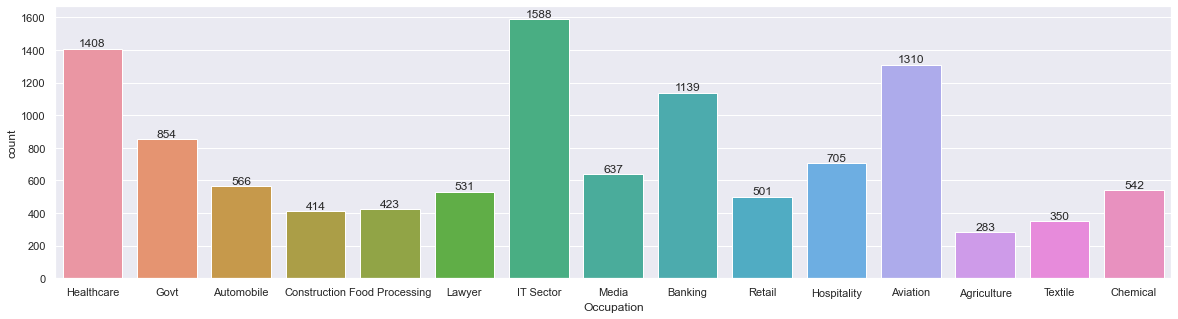

In [29]:
#set the figure size
sns.set(rc = {"figure.figsize" : (20,5)})

#plotting count plot - Occupation and it's count
ax = sns.countplot(x = 'Occupation', data = df)

#display the count 
for bars in ax.containers:
    ax.bar_label(bars)
    

Obseravtion - Most of the buyers are working in the sectors - IT, Healthcare, and Aviation

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

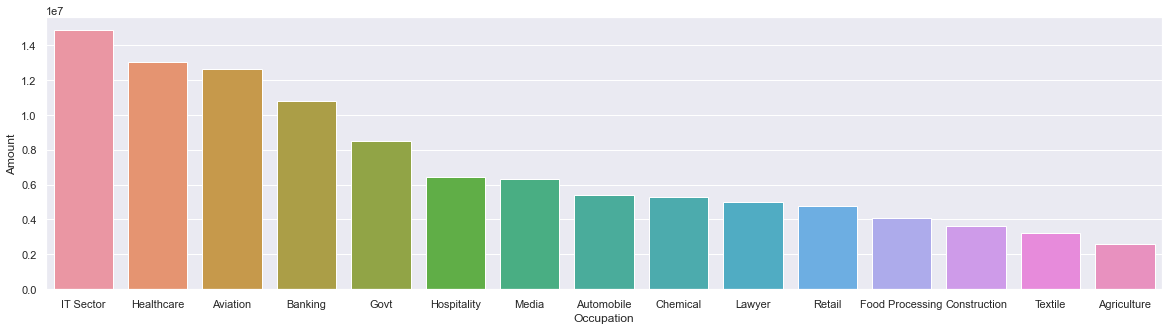

In [30]:
#create a new data frame to find total amount spent based on the occupation
sales_state = df.groupby(['Occupation'],as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

#set the figure size
sns.set(rc = {"figure.figsize" : (20,5)})

#plotting bar plot - Occupation vs Amount
sns.barplot(x = "Occupation", y = "Amount", data = sales_state)


Observation - Buyers working in the sectors - IT, Healthcare, and Aviation are spending more amount of money

#### PRODUCT CATEGORY 

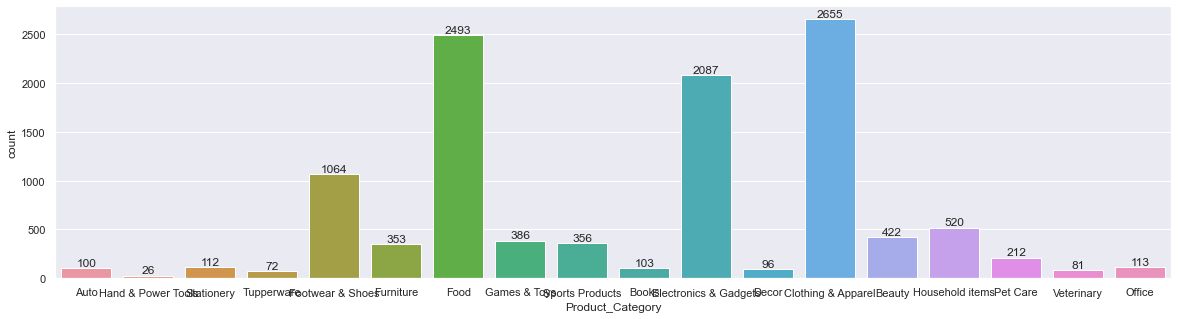

In [31]:
#set the figure size
sns.set(rc = {"figure.figsize" : (20,5)})

#plotting count plot - Product Category and it's count
ax = sns.countplot(x = 'Product_Category', data = df)

#display the count 
for bars in ax.containers:
    ax.bar_label(bars)
    

Observation - Most number of people are buying products from the categories - Clothing&Apparel, Food, and Electronic&Gadgets.

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

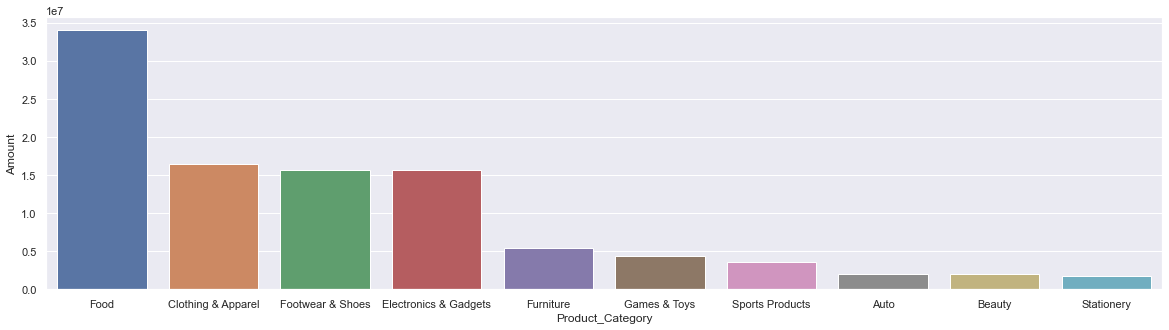

In [32]:
#create a new data frame to find total amount spent based on the product categories
sales_category = df.groupby(['Product_Category'],as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

#set the figure size
sns.set(rc = {"figure.figsize" : (20,5)})

#plotting bar plot - Occupation vs Amount
sns.barplot(x = "Product_Category", y = "Amount", data = sales_category)


Observation - According to the amount spent by customers, most of the sold products are from Food, Clothing&Apparel, and Footwear&Shoes categories

### Conclusion

Most of the buyers who have the maximum purchasing power are in the following groups:
-   Unmarried women in the age group 26-35 years 
-   From the states - UP,  Maharastra and Karnataka
-   Working in IT, Healthcare and Aviation sectors
-   More likely to buy products from Food, Clothing&Apparel, and Footwear&Shoes categories